<a href="https://colab.research.google.com/github/ramiro-l/ModelosYSimulacionFAMAF/blob/main/Pr%C3%A1ctico5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRÁCTICO 5

## Ejercicio 1

Desarrolle un método para generar una variable aleatoria cuya densidad de probabilidad es:

### a)

$$
f(x) =
\begin{cases}
\frac{x-2}{2} & \text{si } 2 \leq x \leq 3 \\
\frac{2 - x/3}{2} & \text{si } 3 \leq x \leq 6 \\
0 & \text{en otro caso}
\end{cases}
$$

#### Parte Teorica

Para poder usar transformada inversa tengo que encontrar su $F(x)$, para ello tengo que calcular $\int_{-∞}^{x}f(x)dx$.


Si $-∞≤x≤2$
\begin{align}
\int_{-∞}^{x}f(x)dx & = 0
\end{align}


Si $2≤x≤3$
\begin{align}
\int_{-∞}^{x}f(x)dx & = \int_{-∞}^{x}(x-2)/2dx \\
& = \frac{x^{2}}{4}-x+1
\end{align}

Si $3≤x≤6$
\begin{align}
\int_{-∞}^{x}f(x)dx & = \int_{2}^{3}f(x)dx + \int_{3}^{6}f(x)dx \\
& = \frac{3^{2}}{4}-3+1 + \int_{3}^{6}f(x) \\
& = \frac{-x^{2}}{12}+x-2
\end{align}

Entonces nos queda que:

$$
F(x) =
\begin{cases}
0 & \text{si } x \le 2 \\
\frac{x^{2}}{4}-x+1 & \text{si } 2 \le x \le 3 \\
\frac{-x^{2}}{12}+x-2 & \text{si } 3 \le x \le 6 \\
1 & \text{si } x \ge 6
\end{cases}
$$

Notar que el punto de quiebre es en

$$
F(3) = \frac{3^{2}}{4}-3+1 = \frac{9}{4}-2 = \frac{1}{4}
$$

Ahora queda calcular $F^{-1}$ por partes igualando a $u$ una uniforme en el $0,1$.

> Recordar **Bhaskara**:
>
> Si $ax^{2} + bx + c = 0$ tenemos que las raices son
> $$ x_1 = \frac{-b + \sqrt{b^2 - 4ac}}{2a}\ \ \ \ y\ \ \ \ x_2 = \frac{-b - \sqrt{b^2 - 4ac}}{2a}$$

Tenemos que despejar:

$$
u = \frac{x^{2}}{4}-x+1 \ \ \ \ (1)
$$
y
$$
u = \frac{-x^{2}}{12}+x-2 \ \ \ \ (2)
$$

Veamos (1)

\begin{align}
u & = \frac{x^{2}}{4}-x+1 \\
0 & = \frac{x^{2}}{4}-x+(1-u) \\
0 & = \frac{1}{4} \cdot x^{2}+(-1) \cdot x+(1-u)
\end{align}

entonces $a=\frac{1}{4}$, $b=-1$ y $c=1-u$

\begin{align}
x_i & = \frac{-(-1) \pm \sqrt{(-1)^2 - 4\frac{1}{4}(1-u)}}{2\frac{1}{4}} \\
x_i & = \frac{1 \pm \sqrt{1 - 1+u}}{\frac{1}{2}} \\
x_i & = (1 \pm \sqrt{u})\cdot2 \\
\end{align}

entonces

$$
x_1 = 2 + 2\cdot\sqrt{u} \ \ \ \ \ \ y \ \ \ \ \ \ x_2 = 2 - 2\cdot\sqrt{u}
$$

Como $x_1$ toma valores entre el $[2,4]$ y $x_2$ toma valores en el $[0,2]$ usamos $x_1$

Veamos (2)

\begin{align}
u & = \frac{-x^{2}}{12}+x-2  \\
0 & = \frac{-x^{2}}{12}+x-2-u  \\
0 & = \frac{-1}{12} \cdot x^{2}+x+(-2-u)  \\
\end{align}

entonces $a=\frac{-1}{12}$, $b=1$ y $c=(-2-u)$ por lo tanto

\begin{align}
x_i & =  \frac{-1 \pm \sqrt{1^2 - 4(\frac{-1}{12})(-2-u)}}{2(\frac{-1}{12})} \\
x_i & =  \frac{-1 \pm \sqrt{1 - \frac{2+u}{3}}}{\frac{-1}{6}} \\
x_i & =  6 \pm 6 \cdot \sqrt{ 1 - \frac{2+u}{3} } \\
x_i & =  6 \pm 6 \cdot \sqrt{ 1 - \frac{2}{3} - \frac{u}{3} } \\
x_i & =  6 \pm 6 \cdot \sqrt{ \frac{1}{3} - \frac{u}{3} } \\
x_i & =  6 \pm 6 \cdot \sqrt{\frac{1 - u}{3}} \\
x_i & =  6 \pm 2 \cdot 3 \cdot \sqrt{\frac{1 - u}{3}} \\
x_i & =  6 \pm 2 \cdot \sqrt{9} \cdot \sqrt{\frac{1 - u}{3}} \\
x_i & =  6 \pm 2 \cdot \sqrt{9\cdot(\frac{1 - u}{3})} \\
x_i & =  6 \pm 2 \cdot \sqrt{3\cdot(1 - u)} \\
\end{align}

entonces

$$
x_1 = 6 - 2 \cdot \sqrt{3\cdot(1 - u)}  \ \ \ \ \ \ y \ \ \ \ \ \ x_2 = 6 + 2 \cdot \sqrt{3\cdot(1 - u)}
$$

Como $x_1$ toma valores aproximadamente entre el $[2.5,6]$ y $x_2$ toma valores en el $[6,8.5]$ usamos $x_1$





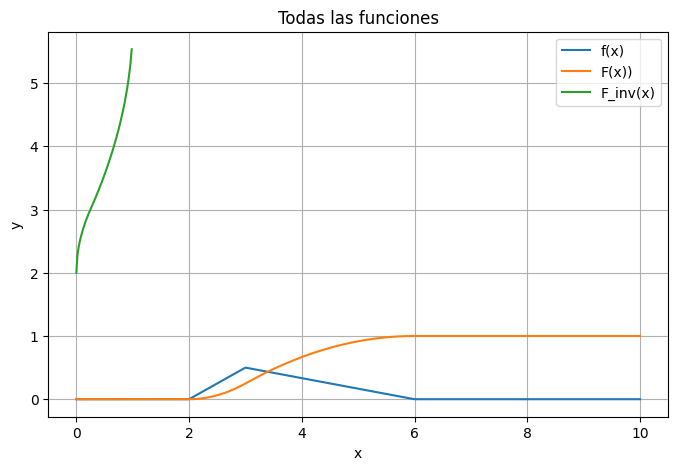

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de f(x)
def f(x):
    return np.where(
        (2 <= x) & (x <= 3),
        (x - 2) / 2,
        np.where(
            (3 < x) & (x <= 6),
            (2 - x / 3) / 2,
            0
        )
    )

# Definición de F(x)
def F(x):
    return np.where(
        (x <= 2),
        0,
        np.where(
            (x <= 3),
            (x**2)/4 - x + 1,
            np.where(
                (x <= 6),
                -x**2/12 + x - 2,
                1
            )
        )
    )

# Definición de F_inv(x)
def F_inv(x):
    return np.where(
        (x <= 1/4),
        2 + 2 * np.sqrt(x),
        np.where(
            (x <= 1),
            6 - 2 * np.sqrt(np.maximum(0, 3 * (1 - x))),
            np.nan
        )
    )


# Dominio común
x = np.linspace(0, 10, 500)

# Evaluar funciones
y_f = f(x)
y_F = F(x)
y_F_inv = F_inv(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y_f, label="f(x)")
plt.plot(x, y_F, label="F(x))")
plt.plot(x, y_F_inv, label="F_inv(x)")


plt.title("Todas las funciones")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#### Código

In [ ]:
from random import random

def f_tinv():
  u = random()
  if u < 0.25:
    return 2 + 2*np.sqrt(u)
  else:
    return 6 - 2*np.sqrt(3*(1-u))


In [ ]:
f_tinv()

np.float64(5.144761229090943)

#### Revisamos
Revisamos que o generado corresponfa con la distibución deseada:

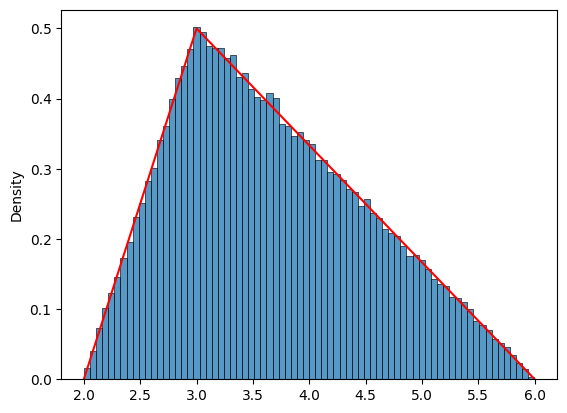

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def f(x):
    return np.where(
        (2 <= x) & (x <= 3),
        (x - 2) / 2,
        np.where(
            (3 < x) & (x <= 6),
            (2 - x / 3) / 2,
            0
        )
    )

x = np.linspace(2, 6, 1000) # Genero el intervalo
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=f_tinv()


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

### b)

$$
f(x) =
\begin{cases}
\frac{6(x+3)}{35} & \text{si } 0 \leq x \leq 1 \\
\frac{6x^2}{35} & \text{si } 1 \leq x \leq 2 \\
0 & \text{en otro caso}
\end{cases}
$$

#### Parte teorica

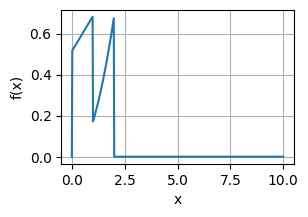

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.where(
        (x <= 0),
        0,
        np.where(
            (x <= 1),
            (6 * (x + 3)) / 35,
            np.where(
                (x <= 2),
                (6 * x**2)/ 35,
                0
            )
        )
    )

x = np.linspace(0, 10, 500)
y_f = f(x)

plt.figure(figsize=(3, 2))
plt.plot(x, y_f)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()


> Aclaración: No voy a ir con tanto detalle, el procedimiento es similar a la parte a).

Calculo $F(x)$ por partes:

Si $-∞≤x≤0$
\begin{align}
\int_{-∞}^{x}f(x)dx & = 0
\end{align}

Si $0≤x≤1$
\begin{align}
\int_{-∞}^{x}f(x)dx & = \int_{0}^{x} \frac{6(x+3)}{35}dx \\
& =  \frac{6}{35} ⋅ \int_{0}^{x} (x+3)dx \\
& =  \frac{6}{35} ⋅ \left[\frac{x^2}{2}+3x\right]_0^x \\
& =  \frac{6}{35} ⋅ \left(\left(\frac{x^2}{2}+3x\right) - \left(\frac{0^2}{2}+3\cdot0\right)\right)\\
& =  \frac{6}{35} ⋅ \left(\frac{x^2}{2}+3x\right) \\
& =  \frac{6}{35} ⋅ \frac{x^2}{2}+ \frac{6}{35} ⋅ 3x \\
& =  \frac{3}{35} ⋅ x^2+ \frac{18}{35} ⋅ x \\
& =  \frac{3}{35} ⋅ x^2+ \frac{18}{35} ⋅ x \\
\end{align}

Si $1≤x≤2$
\begin{align}
\int_{-∞}^{x}f(x)dx & = \int_{0}^{1}f(x)dx + \int_{1}^{x} \frac{6x^2}{35} dx \\
& = \frac{3}{35} ⋅ 1^2+ \frac{18}{35} ⋅ 1+ \int_{1}^{x} \frac{6x^2}{35} dx \\
& = \frac{21}{35} + \int_{1}^{x} \frac{6x^2}{35} dx \\
& = \frac{21}{35}  + \frac{6}{35} \cdot \int_{1}^{x} x^2 dx \\
& = \frac{21}{35}  + \frac{6}{35} ⋅ \left[\frac{x^3}{3}\right]_1^x \\
& =  \frac{21}{35}  + \frac{6}{35} ⋅ \left(\left(\frac{x^3}{3}\right) - \left(\frac{1^3}{3}\right)\right)\\
& =  \frac{21}{35}  + \frac{6}{35} ⋅ \left(\left(\frac{x^3}{3}\right) - \left(\frac{1}{3}\right)\right)\\
& = \frac{21}{35}  + \frac{6}{35} ⋅ \frac{x^3}{3} - \frac{6}{35} ⋅ \frac{1}{3}\\
& =\frac{21}{35}  + \frac{2}{35} ⋅ x^3 - \frac{2}{35} \\
& = \frac{2}{35} ⋅ x^3 + \frac{19}{35} \\
\end{align}

> Revisar que F(2) sea 1:
> $$\frac{2}{35} ⋅ 2^3 + \frac{19}{35} = \frac{16}{35} + \frac{19}{35} = \frac{53}{35} = 1$$

entonces F(x) queda definida por:


$$
F(x) =
\begin{cases}
0 & \text{si } x < 0 \\
\frac{3}{35} ⋅ x^2+ \frac{18}{35} ⋅ x  & \text{si } 0 \le x \le 1 \\
\frac{2}{35} ⋅ x^3 + \frac{19}{35} & \text{si } 1 < x \le 2 \\
1 & \text{si } x > 2
\end{cases}
$$

y el punto de quiebre es en:

$$
F(1) = \frac{3}{35} ⋅ 1^2+ \frac{18}{35} ⋅ 1 = \frac{3}{35}+ \frac{18}{35} = \frac{21}{35} = \frac{3}{5}
$$





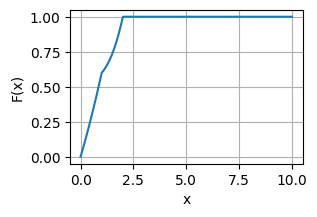

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def F(x):
    return np.where(
        (x <= 0),
        0,
        np.where(
            (x <= 1),
            (3 / 35) * x**2 + (18 / 35) * x,
            np.where(
                (x <= 2),
                (2 / 35) * x**3 + (19 / 35),
                1
            )
        )
    )

x = np.linspace(0, 10, 500)
y_F = F(x)

plt.figure(figsize=(3, 2))
plt.plot(x, y_F)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid(True)
plt.show()

Ahora queda despejar la $x$ de:

$$
u = F(x)
$$

Si $0≤x≤1$
\begin{align}
u & = F(x) \\
u & = \frac{3}{35} ⋅ x^2+ \frac{18}{35} ⋅ x \\
u & = \frac{1}{35} \cdot \left( 3 ⋅ x^2+ 18 ⋅ x \right) \\
u \cdot 35 & =  3 ⋅ x^2+ 18 ⋅ x  \\
0 & =  3 ⋅ x^2+ 18 ⋅ x - u \cdot 35  \\
\end{align}

Ahora buscamos las raices con $a=3$ , $b=18$ y $c=(-u\cdot35)$:

\begin{align}
x_i & = \frac{-18 \pm \sqrt{18^2 - 4\cdot3(-u⋅35)}}{2\cdot3} \\
 & = \frac{-18 \pm \sqrt{18^2 + 4⋅3⋅35⋅u}}{6} \\
 & = \frac{-18 \pm \sqrt{324 + 420⋅u}}{6} \\
 & = -\frac{18}{6} \pm \frac{\sqrt{324 + 420⋅u}}{6}  \\
 & = -3 \pm \frac{\sqrt{324 + 420⋅u}}{6}  \\
\end{align}

Claramente debemos tomar $x_2 =-3 + \frac{\sqrt{324 + 420⋅u}}{6}$ para que x este en el intervalor $(0,1)$.

Si $1 < x ≤ 2$

\begin{align}
u & = F(x) \\
u & = \frac{2}{35} ⋅ x^3 + \frac{19}{35} \\
u - \frac{19}{35} & =  x^3 \\
\left(u - \frac{19}{35}\right)⋅\frac{35}{2} & =  x^3 \\
\sqrt[3]{\left(u - \frac{19}{35}\right)⋅\frac{35}{2}} & =  x \\
\sqrt[3]{u\cdot\frac{35}{2} - \frac{19}{35}⋅\frac{35}{2}} & =  x \\
\sqrt[3]{u\cdot\frac{35}{2} - \frac{19}{2}} & =  x
\end{align}




<ipython-input-33-dfe16280da14>:14: RuntimeWarning: invalid value encountered in power
  (x*(35/2)-(19/2))**(1/3),


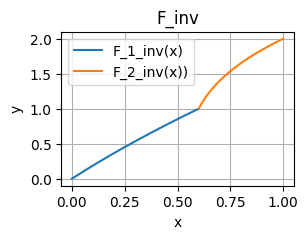

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def F_1_inv(x):
    return np.where(
        (x <= 3/5),
        -3 + np.sqrt(324 + 420 * x) / 6,
        np.nan
    )

def F_2_inv(x):
    return np.where(
        (x > 3/5) & (x <= 1),
        (x*(35/2)-(19/2))**(1/3),
        np.nan
    )


# Dominio común
x = np.linspace(0, 1, 1000)

# Evaluar funciones
y_F_1_inv = F_1_inv(x)
y_F_2_inv = F_2_inv(x)

plt.figure(figsize=(3, 2))
plt.plot(x, y_F_1_inv, label="F_1_inv(x)")
plt.plot(x, y_F_2_inv, label="F_2_inv(x))")

plt.title("F_inv")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#### Código

In [ ]:
from random import random
import numpy as np

def f_tinv_ejb():
  u = random()
  if u <= 3/5:
    return -3 + np.sqrt(324 + 420 * u) / 6
  else:
    return ((u*35-19)/2)**(1/3)

In [ ]:
f_tinv_ejb()

np.float64(0.14405591049286715)

#### Revisamos

Revisamos que lo generado corresponda con la distibución deseada:

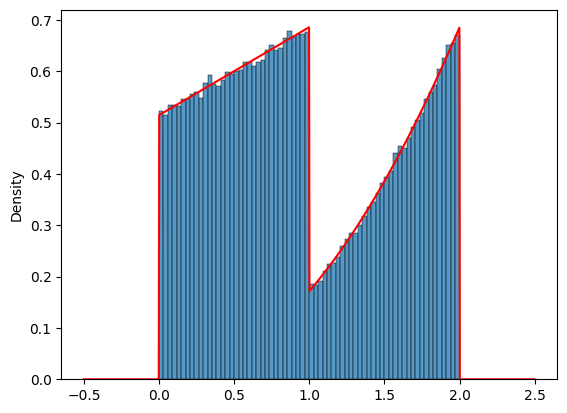

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.where(
        (x <= 0),
        0,
        np.where(
            (x <= 1),
            (6 * (x + 3)) / 35,
            np.where(
                (x <= 2),
                (6 * x**2)/ 35,
                0
            )
        )
    )

x = np.linspace(-0.5, 2.5, 1000)
n_sim = int(4e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=f_tinv_ejb()


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

### c)

$$
f(x) =
\begin{cases}
\frac{e^{4x}}{4} & \text{si } -\infty < x \leq 0 \\
\frac{1}{4} & \text{si } 0 < x \leq \frac{15}{4} \\
0 & \text{en otro caso}
\end{cases}
$$

#### Parte teorica

Echa en papel, es facil.

#### Código

In [ ]:
from random import random
import numpy as np

def f_tinv_ejc():
  u = random()
  if u <= 1/16:
    return np.log(16*u)/4
  else:
    return 4*u-1/4


In [ ]:
f_tinv_ejc()

2.0705212509594135

#### Revisamos

Revisamos que lo generado corresponda con la distibución deseada:

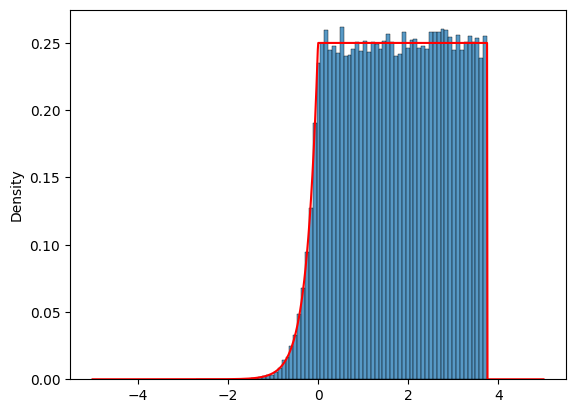

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.where(
        (x <= 0),
        np.exp(4 * x) / 4,
        np.where(
            (x <= 15/4),
            1/4,
            0
        )
    )

x = np.linspace(-5, 5, 1000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=f_tinv_ejc()


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

## Ejercicio 2

## a)

Desarrolle métodos para generar las siguientes variables aleatorias:

> Ayuda: la distribución Pareto y la distribución Weibull tienen distribución acumulada F con forma
cerrada, por lo cual puede aplicarse el método de la transformada Inversa. La distribución de Erlang
pertenece a la familia de las Gammas. Puede simularse por rechazo o como suma de exponenciales.


### i) Distribución Pareto


$$f(x) = a x^{-(a+1)}, \quad 1 \leq x < \infty,\quad a > 0$$

#### Parte teorica

Como se menciona que tiene una F() cerrada, voy a usar el metodo de la transformada inversa.

Primero voy a buscar su función de distibución acumulada (F(x)), analizando por intervalos:

Si $-∞≤x≤1$:
\begin{align*}
F(x) = \int_{-∞}^{x} f(x) dx = 0
\end{align*}

Si $1≤x≤∞$:
\begin{align*}
F(x) & = \int_{-∞}^{x} f(x) dx \\
& = \int_{1}^{x} a x^{-(a+1)} dx \\
& = a⋅\int_{1}^{x} x^{-(a+1)} dx \\
& = a⋅\left[ \frac{x^{-(a+1)+1}}{-(a+1)+1} \right]_1^{}\\
& = a⋅\left[ \frac{x^{-a}}{-a} \right]_1^{x} \\
& = a⋅\left( \frac{x^{-a}}{-a} -  \frac{1^{-a}}{-a} \right) \\
& = a⋅ \frac{1}{-a} ⋅ \left( x^{-a} -  1^{-a} \right) \\
& = - \left( x^{-a} -  1^{-a} \right) \\
& = - \left( x^{-a} -  1 \right) \\
& = 1 - x^{-a} \\
\end{align*}

entonces tenemos que:

$$
F(x) =
\begin{cases}
0 & \text{si } x < 1 \\
1 - x^{-a}  & \text{si } 1 \le x \le ∞ \\
\end{cases}
$$

> Claramente $F(∞) = 1 - x^{-∞} = 1 - \frac{1}{x^{∞}} = 1-0 = 1$

Ahora igualamos $F(x)$ a $u$ una v.a uniforme en el $(0,1)$ y despejamos la $x$.

\begin{align*}
F(x) & = u \\
1 - x^{-a} & = u \\
1 - u  & =  x^{-a} \\
\sqrt[-a]{1 - u} & =  \sqrt[-a]{x^{-a}} \\
\sqrt[-a]{1 - u} & =  x \\
\left(1 - u\right)^{-\frac{1}{a}} & =  x \\
\end{align*}

#### Código

In [67]:
from random import random
import numpy as np

def pareto_tinv(a):
  u = random()
  return (1-u)**(-1/a)

In [68]:
pareto_tinv(2)

2.115085818617671

#### Revisamos

Basicamente revisamos que lo generado corresponda con la distibución deseada:

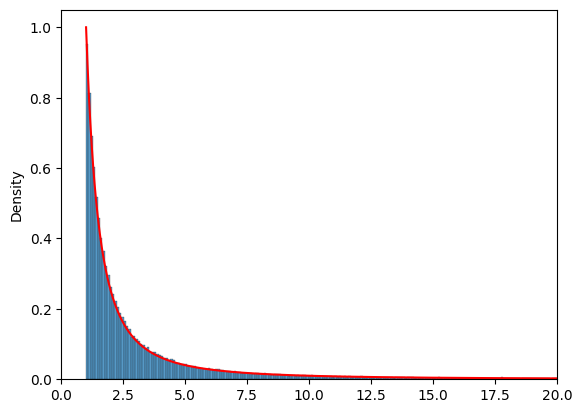

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

a = 1

def f(x):
    return np.where(
        (x <= 0),
        0,
        a*(x**(-(a+1)))
    )



limit = 20
x = np.linspace(1, limit, 1_000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=pareto_tinv(a)

s_filtered = s[s < limit]
sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s_filtered, stat = 'density')
plt.xlim(0, limit)
plt.show()

### ii) Distribución Erlang

$$f(x) = \frac{x^{k-1} e^{-x/\mu}}{(k -1)! \, \mu^{k}}, \quad 0 \leq x < \infty,\quad \mu > 0,\quad k\ \text{entero}$$

#### Parte teorica

En la consigna nos ayuda diciendo que se parece a una gama y por ello conviene usar el metodo de acepración y rechazo. Recordemos la **PDF** de una gama:

Dados $α > 0$ y $β > 0$ tenemos que:
$$
f_{Gama}(x) = \frac{1}{\Gamma(α)} β^{-α} x^{α - 1} e^{-x/β}\ \ \ \ si\ x>0
$$

pero si tomamos $α  = k \in N$, tenemos que:
\begin{align*}
f_{Gama}(x) & = \frac{1}{(k−1)!} β^{-k} x^{k - 1} e^{-x/β} \\
& = \frac{x^{k - 1} e^{-x/β}}{(k−1)! β^{k}}
\end{align*}

y asi llegamos a la f. Notar que $f_{Gama}$ y la nuesta son iguals si $k = \alpha$ y $α =β$.

Ahora queda ver que metodo usar. Recordar que en el teorico vimos que:

- **Distribucion del tiempo de arribo (2.1.4)** \\
Dadas $X_1, X_2, . . . , X_n$ con $Xj∼E(λ)$ tenemos que
$$
\sum_{i=1}^{n} X_i ∼ Gama\left(n, \frac{1}{λ}\right)
$$

- **Usar aceptación y rechazo con una exponencial** \\
Mucho laburo ...

De todas formas hay que generar una exponencial y luego usarla.


#### Código

In [78]:
from random import random
from numpy import log

def exponencial(lamda):
  U = 1-random()
  return -log(1-U)/lamda

In [79]:
def erlang_sum_exp(k,u):
  exp = [exponencial(1/u) for _ in range(k)]
  return sum(exp)

In [80]:
erlang_sum_exp(2,2)

np.float64(3.257135549446696)

#### Revisamos

Revisamos que lo generado corresponda con la distibución deseada:

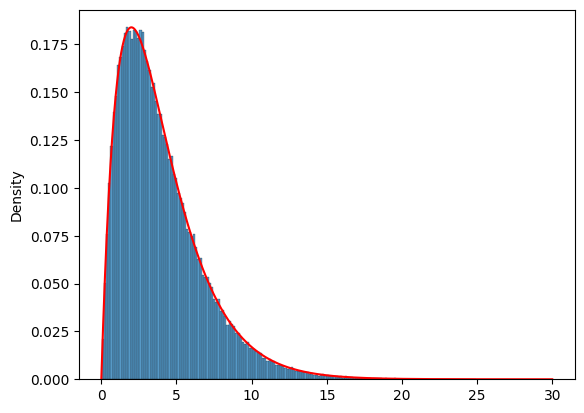

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

k = 2
u = 2

def f(x):
    return np.where(
        (x >= 0),
        (x**(k-1) * np.exp(-x/u)) / (math.factorial(k-1) * u**k),
        0
    )

x = np.linspace(0, 30, 1000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=erlang_sum_exp(k,u)


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

### iii) Distribución Weibull

$$
f(x) = \frac{\beta}{\lambda} \left( \frac{x}{\lambda} \right)^{\beta - 1}e^{- \left( x/\lambda \right)^{\beta}}, \quad x \geq 0,\quad \lambda > 0,\quad \beta > 0
$$

Notar que se puede simplificar:

\begin{align*}
f(x) & = \frac{\beta}{\lambda} \left( \frac{x}{\lambda} \right)^{\beta - 1}e^{- \left( x/\lambda \right)^{\beta}} \\
 & = \beta \lambda^{-1} \left( \frac{x}{\lambda} \right)^{\beta - 1}e^{- \left( x/\lambda \right)^{\beta}} \\
 & = \beta \lambda^{-1} \lambda^{-({\beta - 1})} x^{\beta - 1} e^{- \left( x/\lambda \right)^{\beta}} \\
 & = \beta \lambda^{-1} \lambda^{-\beta + 1} x^{\beta - 1} e^{- \left( x/\lambda \right)^{\beta}} \\
 & = \beta \lambda^{-\beta} x^{\beta - 1} e^{- \left( x/\lambda \right)^{\beta}} \\
\end{align*}

#### Parte teorica

Segun la ayuda, tenemos que $f$ tiene que existe formula cerrada para $F$ y nos sirve para usar el metodo de la trasnformada inversa.

Calculemos:

\begin{align*}
F(x) & = \int_{-∞}^{x} f(x) dx \\
& = \int_{-∞}^{x} \beta \lambda^{-\beta} x^{\beta - 1} e^{- \left( x/\lambda \right)^{\beta}} dx \\
& =  \beta \lambda^{-\beta}  \int_{-∞}^{x}x^{\beta - 1} e^{- \left( x/\lambda \right)^{\beta}} dx \\
& ... \\
& = 1-e^{−(x/λ)^β}
\end{align*}

> Ayuda: https://en.wikipedia.org/wiki/Weibull_distribution

por lo tanto si igualamos a $u$ una v.a uniforme en el (0,1):

\begin{align*}
F(x) & = u \\
1-e^{-(x/λ)^{β}} & = u \\
e^{-(x/λ)^{β}} & = 1-u \\
\frac{1}{e^{(x/λ)^{β}}} & = 1-u \\
e^{(x/λ)^{β}} & = \frac{1}{1-u} \\
(x/λ)^{β} & = ln\left(\frac{1}{1-u} \right)\\
x/λ & = \sqrt[β]{ ln\left(\frac{1}{1-u} \right)}\\
x & = \sqrt[β]{ ln\left(\frac{1}{1-u} \right)} ⋅ λ\\
x & = \sqrt[β]{-ln(1-u)} ⋅ λ\\
\end{align*}


#### Código

In [69]:
from random import random
import numpy as np

def weibull_tinv(beta, lamda):
  u = random()
  return ((np.log(1/(1-u)))**(1/beta)) * lamda

In [34]:
weibull_tinv(2,2)

np.float64(2.066015008782673)

#### Revisamos

Revisamos que lo generado corresponda con la distibución deseada:

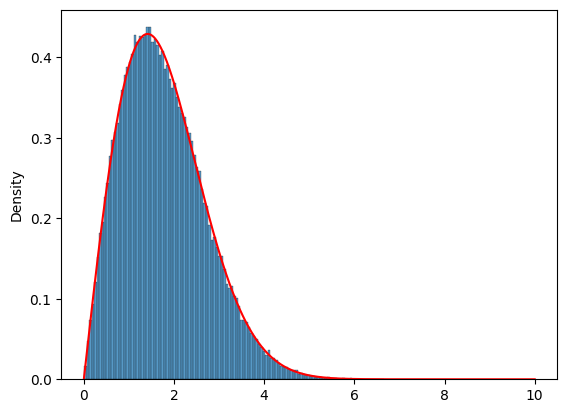

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

beta = 2
lamda = 2

def f(x):
    return np.where(
        (x <= 0),
        0,
        (beta/lamda) * (x/lamda)**(beta-1) * np.exp(-(x/lamda)**beta)
    )



x = np.linspace(0, 10, 1_000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=weibull_tinv(beta, lamda)

sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

## b)
Estime la media de cada variable con 10.000 repeticiones, usando los parámetros $α$ = 2, µ = 2, k = 2, λ = 1, β = 2. Busque en la web los valores de las esperanzas para cada variable con estos parámetros (cuidado con las parametrizaciones) y compare los valores obtenidos.

Fuentes:

- https://en.wikipedia.org/wiki/Pareto_distribution \\
$E[Pareto(α)] = α/(α-1)$ si $α>1$ \\
$E[Pareto(α)] = ∞\ \ \ \  \ \ \ \ \ \ \ \ \ \ $si $α ≤ 1$

- De las notas de clase \\
$E[Erlang(k,μ)] = E[Gamma(k,μ)] = k\cdotμ$

- De las notas de clase \\
$E[Weibull(β,λ)] = λ/β  \cdot \Gamma (1/β)$


In [84]:
import math

def pareto_esperanza_exacta(a):
  return a/(a-1)

def erlang_esperanza_exacta(k,u):
  return k*u

def weibull_esperanza_exacta(beta, lamda):
  return (lamda/beta)*math.gamma(1/beta)

def etimacion_esperanza(N, metodo, *args,**kwargs):
  valores = [metodo(*args, **kwargs) for _ in range(N)]
  return sum(valores)/N

N = 10000
parametros = [
    ("Pareto", {"a": 2}, pareto_tinv, pareto_esperanza_exacta),
    ("Erlang", {"k": 2, "u": 2}, erlang_sum_exp, erlang_esperanza_exacta),
    ("Weibull", {"beta": 2, "lamda": 1}, weibull_tinv, weibull_esperanza_exacta),
]

for nombre, parametros_metodo, metodo, esperanza_exacta in parametros:
  estimacion_esperanza = etimacion_esperanza(N, metodo, **parametros_metodo)
  esperanza_exacta = esperanza_exacta(**parametros_metodo)
  print("-"*50)
  print(f"Distibución {nombre}")
  print(f"-   Estimación de la esperanza: {estimacion_esperanza}")
  print(f"-   Esperanza exacta: {esperanza_exacta}")
  print("-"*50)




--------------------------------------------------
Distibución Pareto
-   Estimación de la esperanza: 2.0174864571590367
-   Esperanza exacta: 2.0
--------------------------------------------------
--------------------------------------------------
Distibución Erlang
-   Estimación de la esperanza: 3.968814879335733
-   Esperanza exacta: 4
--------------------------------------------------
--------------------------------------------------
Distibución Weibull
-   Estimación de la esperanza: 0.8821168772378932
-   Esperanza exacta: 0.8862269254527579
--------------------------------------------------
